#### Created by Andras Gyenis for CU Boulder ECEE 4/5005-001 Fall 2022

In [1]:
# Importing packages, modules.
import numpy as np
import qutip as qt

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Initial definitions

In [2]:
# define qubit basis states
psi0 = qt.basis(2,0)
psi1 = qt.basis(2,1)

# define operators 
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

# define quantities to evaluate
M0 = psi0*psi0.dag() # |0><0| measurement operator
M1 = psi1*psi1.dag() # |1><1| measurement operator


## Undriven qubit in the lab frame

In [3]:
# qubit parameters in the units of hbar
omega_0 = 1 # qubit transition frequency 

# the Hamiltonian in function form
def H_Rabi(t):
    H_op =  -0.5 * omega_0 * sz
    
    return [H_op, np.ones(len(t))] # Hamiltonian as operator-function pairs; function here is 1 because the Hamiltonian is not time-dependent

# define time axis
t_list = np.linspace(0, 2, 201)

initial_state = (psi0 + psi1).unit() # start the evolution always in the |+> state

# solve numerically the Rabi Hamiltonian
result = qt.mesolve(H_Rabi(t_list), initial_state, t_list)


# initalize the qubit state vector
rx = []
ry = []
rz = []

for n in np.arange(0, len(t_list),10):
        
    state = result.states[n]
    
    # extract points on the Bloch sphere
    rx.append(qt.expect(sx, state))
    ry.append(qt.expect(sy, state))
    rz.append(qt.expect(sz, state))

point_position = [rx, ry, rz]


<IPython.core.display.Javascript object>


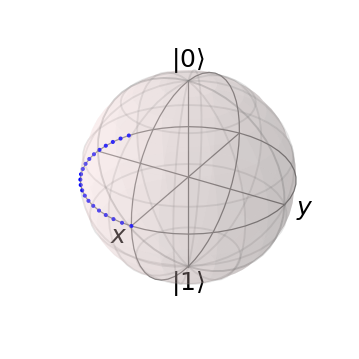

In [4]:
fig, axs = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='3d'))

bloch_sphere = qt.Bloch(fig=fig, axes=axs) # create bloch_sphere object

# set the properties of the Bloch sphere
bloch_sphere.point_marker = ['o']
bloch_sphere.point_size   = [5]
bloch_sphere.view         = [40,35]

bloch_sphere.add_points(point_position)
    
bloch_sphere.render(fig=fig, axes=axs)

plt.show()


## On-resonant Rabi drive

In [5]:
# qubit and drive parameters in the units of hbar
omega_0 = 1 # qubit transition frequency 
omega_x = 1 # drive frequency
Omega_x = 0.1 # drive amplitude

Delta   = omega_0 - omega_x # difference between drive frequency and qubit frequency

# the Hamiltonian in function form
def H_Rabi(t):
    H_op =  -0.5 * Delta * sz + 0.5 * Omega_x * sx
    
    return [H_op, np.ones(len(t))] # Hamiltonian as operator-function pairs; function here is 1 because the Hamiltonian is not time-dependent

# define time axis
t_list = np.linspace(0, 100, 501)

initial_state = psi0 # start the evolution always in the |0> state

# solve numerically the Rabi Hamiltonian
result = qt.mesolve(H_Rabi(t_list), initial_state, t_list, e_ops=[M0, M1])

# calculate the expectation values of the measurement operators
dynamics_result = np.array(result.expect)

p0 = dynamics_result[0]
p1 = dynamics_result[1]

<IPython.core.display.Javascript object>


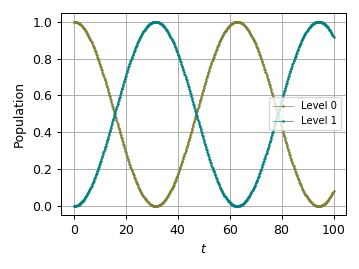

In [6]:
fig, axs = plt.subplots(figsize=(4, 3))

axs.plot(t_list, p0, '-o', markersize= 1, linewidth=0.5,
            color=[0.5,0.5,0.2], label = r'Level 0')

axs.plot(t_list, p1, '-o', markersize= 1, linewidth=0.5,
            color=[0.0,0.5,0.5], label = r'Level 1')

axs.set_xlabel(r"$t$", labelpad=5)
axs.set_ylabel("Population", labelpad=5)
axs.legend(loc='best', fontsize = 8)
axs.grid()

plt.tight_layout()
plt.show()


## General solution of the Rabi model

In [7]:
Delta_list = np.linspace(-0.5,0.5,101)

population = np.zeros((2, len(Delta_list), len(t_list))) # initialize population matrix

initial_state = psi0 # start the evolution always in the |0> state

for Delta_idx, Delta in enumerate(Delta_list):
    
    # solve numerically the Rabi Hamiltonian
    result = qt.mesolve(H_Rabi(t_list), initial_state, t_list, e_ops=[M0, M1])

    # calculate the expectation values of the measurement operators
    dynamics_result = np.array(result.expect)

    p0 = dynamics_result[0]
    p1 = dynamics_result[1]
    
    population[0,Delta_idx,:] = p0
    population[1,Delta_idx,:] = p1



<IPython.core.display.Javascript object>


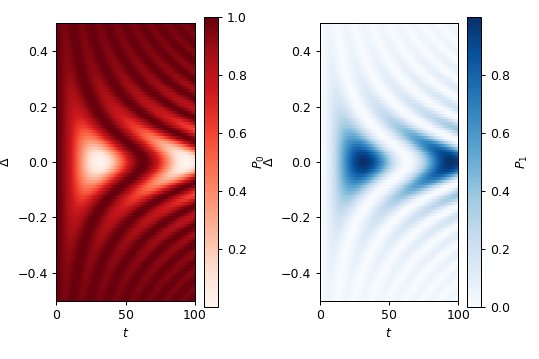

In [8]:
fig, axs = plt.subplots(figsize=(6,4), ncols=2)

im0 = axs[0].imshow(population[0,:,:], 
               extent = [t_list[0], t_list[-1], Delta_list[0], Delta_list[-1]],
               aspect = 200, cmap='Reds')

fig.colorbar(im0, ax=axs[0], label = r'$P_0$')
axs[0].set_xlabel(r'$t$')
axs[0].set_ylabel(r'$\Delta$')

im1 = axs[1].imshow(population[1,:,:], 
               extent = [t_list[0], t_list[-1], Delta_list[0], Delta_list[-1]],
               aspect = 200, cmap='Blues')

fig.colorbar(im1, ax=axs[1], label = r'$P_1$')
axs[1].set_xlabel(r'$t$')
axs[1].set_ylabel(r'$\Delta$')

plt.tight_layout()
plt.show()

### Plot on the Bloch sphere

<IPython.core.display.Javascript object>


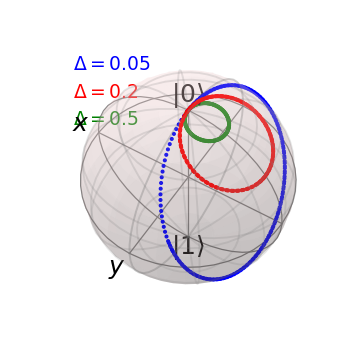

In [9]:
# qubit and drive parameters in the units of hbar
omega_0 = 1 # qubit transition frequency 

Omega_x = 0.1 # drive amplitude


fig, axs = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='3d'))

bloch_sphere = qt.Bloch(fig=fig, axes=axs) # create bloch_sphere object

# set the properties of the Bloch sphere
bloch_sphere.point_marker = ['o']
bloch_sphere.point_size   = [5]
bloch_sphere.view         = [40,35]

# define time axis
t_list = np.linspace(0, 100, 1001)

initial_state = psi0 # start the evolution always in the |0> state


# small detuning
Delta   = 0.05 # difference between drive frequency and qubit frequency

# solve numerically the Rabi Hamiltonian
result = qt.mesolve(H_Rabi(t_list), initial_state, t_list)

rx_S=[]
ry_S=[]
rz_S=[]

for n in np.arange(0,1000,5):
        
    state = result.states[n]
    
    # extract points on the Bloch sphere
    rx_S.append(qt.expect(sx, state))
    ry_S.append(qt.expect(sy, state))
    rz_S.append(qt.expect(sz, state))

point_position_S = [rx_S, ry_S, rz_S]

# medium detuning
Delta   = 0.2 # difference between drive frequency and qubit frequency

# solve numerically the Rabi Hamiltonian
result = qt.mesolve(H_Rabi(t_list), initial_state, t_list)

rx_M=[]
ry_M=[]
rz_M=[]

for n in np.arange(0,1000,5):
    
    state = result.states[n]
    
    # extract points on the Bloch sphere
    rx_M.append(qt.expect(sx, state))
    ry_M.append(qt.expect(sy, state))
    rz_M.append(qt.expect(sz, state))

point_position_M = [rx_M, ry_M, rz_M]


# large detuning
Delta   = 0.5 # difference between drive frequency and qubit frequency

# solve numerically the Rabi Hamiltonian
result = qt.mesolve(H_Rabi(t_list), initial_state, t_list)

rx_L=[]
ry_L=[]
rz_L=[]

for n in np.arange(0,1000,5):

    state = result.states[n]
    
    # extract points on the Bloch sphere
    rx_L.append(qt.expect(sx, state))
    ry_L.append(qt.expect(sy, state))
    rz_L.append(qt.expect(sz, state))

point_position_L = [rx_L, ry_L, rz_L]

bloch_sphere.add_points(point_position_S)
bloch_sphere.add_points(point_position_M)
bloch_sphere.add_points(point_position_L)

axs.annotate(r'$\Delta=0.05$', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=15, color='b')
axs.annotate(r'$\Delta=0.2$', xy=(0.1, 0.8), xycoords='axes fraction', fontsize=15, color='r')
axs.annotate(r'$\Delta=0.5$', xy=(0.1, 0.7), xycoords='axes fraction', fontsize=15, color='g')
    
bloch_sphere.render(fig=fig, axes=axs)


plt.show()

## Rabi Hamiltonian without RWA approximation

In [10]:
# qubit and drive parameters in the units of hbar
omega_0 = 1 # qubit transition frequency 
omega_x = 1 # drive frequency
Omega_x = 0.05 # drive amplitude

Delta   = omega_0 - omega_x # difference between drive frequency and qubit frequency

# the Hamiltonian in function form
def H_Rabi_full(t):
    H_0 = -0.5 * omega_0 * sz # time-independent part
    H_t =  Omega_x * sx # time-dependent part
    
    H_tt = [H_t, np.cos(omega_x*t)] # operator-function pairs for the time-dependent part
       
    return [H_0, H_tt] # Hamiltonian as operator-function pairs

            
# define time axis
t_list = np.linspace(0, 80, 2001)

initial_state = psi0 # start the evolution always in the |0> state

# solve numerically the full Rabi Hamiltonian without RWA
result_full = qt.mesolve(H_Rabi_full(t_list), initial_state, t_list)


# initalize the qubit state vector in lab frame and qubit frame
rx_full_lab = []
ry_full_lab = []
rz_full_lab = []

rx_full_qubit = []
ry_full_qubit = []
rz_full_qubit = []

for n in np.arange(0, len(t_list), 1):
    
    # lab frame
    
    state_lab = result_full.states[n]
    
    # extract points on the Bloch sphere
    rx_full_lab.append(qt.expect(sx, state_lab))
    ry_full_lab.append(qt.expect(sy, state_lab))
    rz_full_lab.append(qt.expect(sz, state_lab))
    
    
    # qubit frame
        
    state_qubit = ( np.cos(omega_0 * t_list[n] / 2) * qt.qeye(2) - 1j * np.sin(omega_0 * t_list[n] / 2) * sz ) * result_full.states[n] 
    
    # extract points on the Bloch sphere
    rx_full_qubit.append(qt.expect(sx, state_qubit))
    ry_full_qubit.append(qt.expect(sy, state_qubit))
    rz_full_qubit.append(qt.expect(sz, state_qubit))

point_position_full_lab   = [rx_full_lab, ry_full_lab, rz_full_lab]
point_position_full_qubit = [rx_full_qubit, ry_full_qubit, rz_full_qubit]


### Plot state on the Bloch sphere in lab frame

<IPython.core.display.Javascript object>


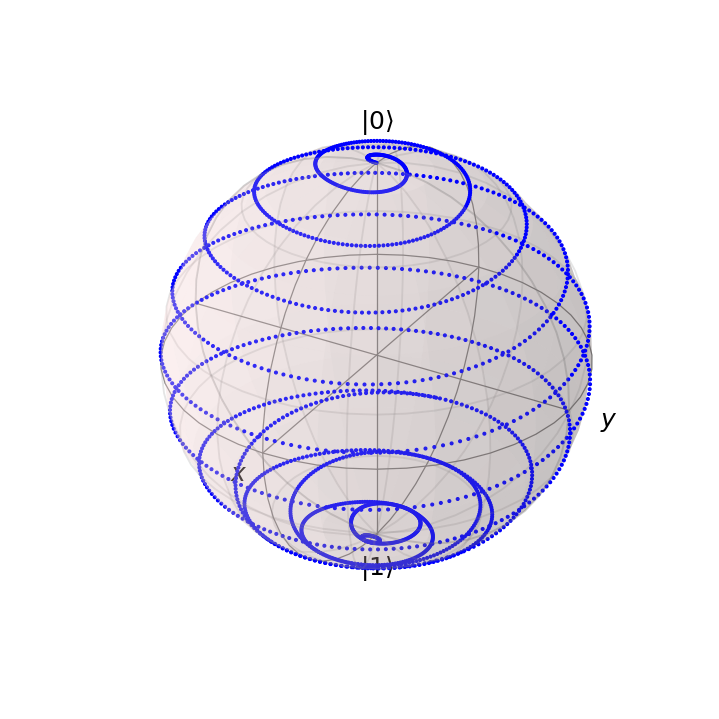

In [11]:
fig, axs = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='3d'))

bloch_sphere = qt.Bloch(fig=fig, axes=axs) # create bloch_sphere object

# set the properties of the Bloch sphere
bloch_sphere.point_marker = ['o']
bloch_sphere.point_size   = [5]
bloch_sphere.view         = [40,35]

bloch_sphere.add_points(point_position_full_lab)
    
bloch_sphere.render(fig=fig, axes=axs)

plt.show()

### Plot state on the Bloch sphere in qubit frame

<IPython.core.display.Javascript object>


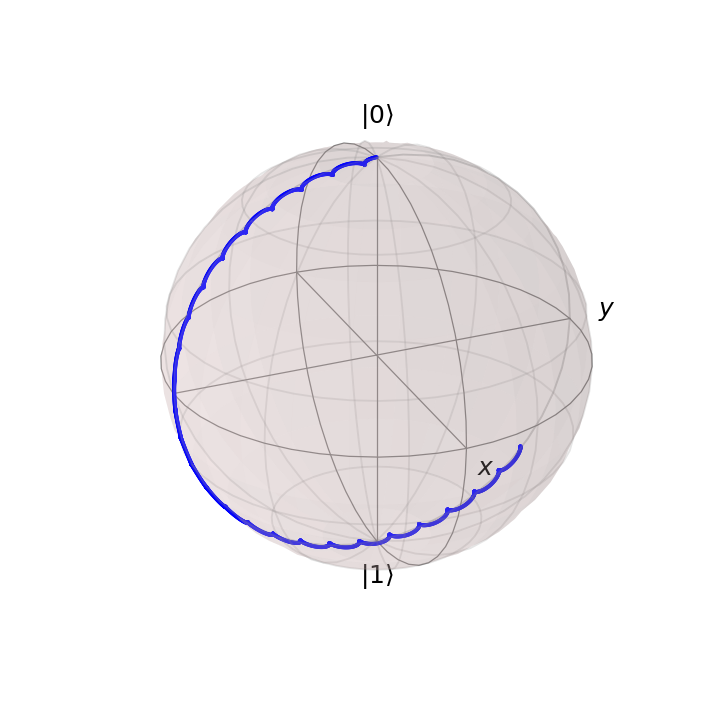

In [12]:
fig, axs = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='3d'))

bloch_sphere = qt.Bloch(fig=fig, axes=axs) # create bloch_sphere object

# set the properties of the Bloch sphere
bloch_sphere.point_marker = ['o']
bloch_sphere.point_size   = [5]
bloch_sphere.view         = [40,35]

bloch_sphere.add_points(point_position_full_qubit)
    
bloch_sphere.render(fig=fig, axes=axs)

plt.show()